# Correlations Heatmaps with significance indicated

Correlations are usefull when exploring data and they are easy to generate using pandas and seaborn, however if you wish to include which correlations are significant it gets more complicated. Here is some code to solve this.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\multitest.py:162: RuntimeWarning: invalid value encountered in greater
  notreject = pvals > alphacSidak_all
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\multitest.py:256: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


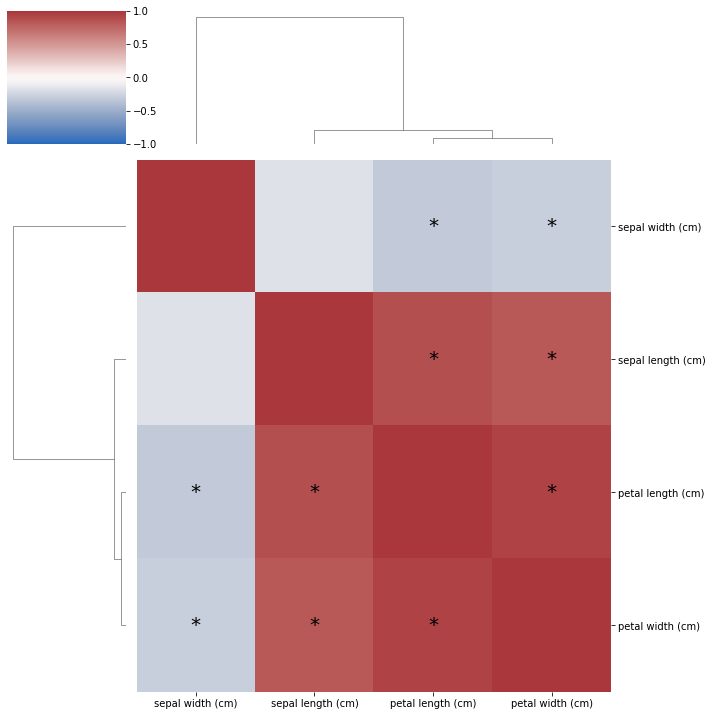

<IPython.core.display.Javascript object>

In [1]:
%load_ext nb_black
from sklearn.datasets import load_iris
from scipy.stats import spearmanr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


iris_obj = load_iris()
iris_df = pd.DataFrame(iris_obj.data, columns=iris_obj.feature_names)


def get_correlations(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how="outer")
    correlations = dfcols.transpose().join(dfcols, how="outer")
    for ix, r in enumerate(df.columns):
        for jx, c in enumerate(df.columns):
            sp = spearmanr(df[r], df[c])
            correlations[c][r] = sp[0]
            pvalues[c][r] = sp[1] if ix > jx else np.nan
    return correlations.astype("float"), pvalues.astype("float")


correlations, uncorrected_p_values = get_correlations(iris_df)


from statsmodels.stats.multitest import multipletests

shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(
    shape
)


g = sns.clustermap(correlations, cmap="vlag", vmin=-1, vmax=1)

for tick in g.ax_heatmap.get_yticklabels():
    tick.set_rotation(0)

for i, ix in enumerate(g.dendrogram_row.reordered_ind):
    for j, jx in enumerate(g.dendrogram_row.reordered_ind):
        if i != j:
            text = g.ax_heatmap.text(
                j + 0.5,
                i + 0.5,
                "*" if significant_matrix[ix, jx] or significant_matrix[jx, ix] else "",
                ha="center",
                va="center",
                color="black",
            )
            text.set_fontsize(20)

plt.tight_layout()
plt.savefig("./img/clustermap.png", dpi=100)

## Additiona checks

A few checks to see if everything was calculated and transformed correctly 

In [2]:
uncorrected_p_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),NaN,NaN,NaN,NaN
sepal width (cm),4.136799e-02,NaN,NaN,NaN
petal length (cm),3.443087e-50,0.000115,NaN,NaN
petal width (cm),4.189447e-40,0.000334,8.156597e-70,NaN


<IPython.core.display.Javascript object>

In [3]:
uncorrected_p_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),NaN,NaN,NaN,NaN
sepal width (cm),4.136799e-02,NaN,NaN,NaN
petal length (cm),3.443087e-50,0.000115,NaN,NaN
petal width (cm),4.189447e-40,0.000334,8.156597e-70,NaN


<IPython.core.display.Javascript object>

In [4]:
uncorrected_p_values["sepal length (cm)"]

sepal length (cm)             NaN
sepal width (cm)     4.136799e-02
petal length (cm)    3.443087e-50
petal width (cm)     4.189447e-40
Name: sepal length (cm), dtype: float64

<IPython.core.display.Javascript object>

In [5]:
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[1].reshape(
    shape
)
significant_matrix

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\multitest.py:162: RuntimeWarning: invalid value encountered in greater
  notreject = pvals > alphacSidak_all
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\multitest.py:256: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


array([[       nan,        nan,        nan,        nan],
       [0.37169405,        nan,        nan,        nan],
       [0.        , 0.00149908,        nan,        nan],
       [0.        , 0.00400421, 0.        ,        nan]])

<IPython.core.display.Javascript object>